  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)

[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: pip install --upgrade pip
Crop Recommendation Model Accuracy: 99.32%

Classification Report:
               precision    recall  f1-score   support

       apple       1.00      1.00      1.00        23
      banana       1.00      1.00      1.00        21
   blackgram       1.00      1.00      1.00        20
    chickpea       1.00      1.00      1.00        26
     coconut       1.00      1.00      1.00        27
      coffee       1.00      1.00      1.00        17
      cotton       1.00      1.00      1.00        17
      grapes       1.00      1.00      1.00        14
        jute       0.92      1.00      0.96        23
 kidneybeans       1.00      1.00      1.00        20
      lentil       0.92      1.00      0.96        11
       maize       1.00      1.00      1.00        21

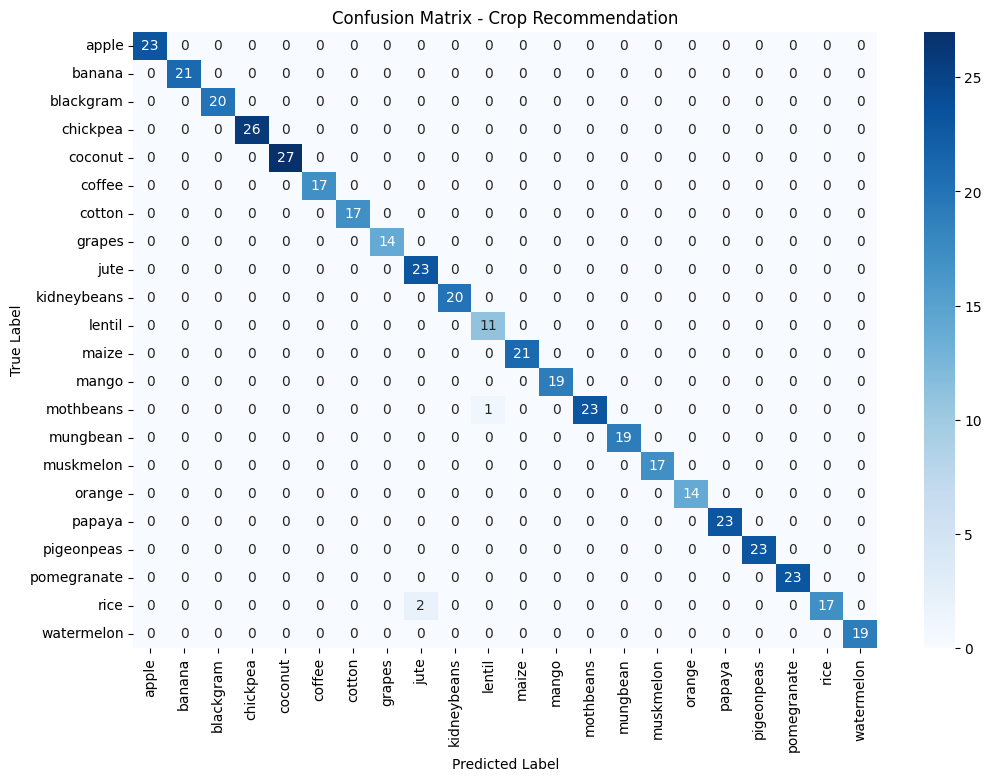

Crop Recommendation Model Saved.


In [1]:
# Install necessary libraries
!pip install pandas scikit-learn joblib matplotlib seaborn

# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import joblib

# Load Dataset
crop_data = pd.read_csv("Crop_recommendation.csv")

# Prepare dataset
X = crop_data.drop(columns=['label'])
y = crop_data['label']

# Split Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Random Forest Classifier
crop_model = RandomForestClassifier(n_estimators=200, random_state=42)
crop_model.fit(X_train, y_train)

# Make Predictions
y_pred = crop_model.predict(X_test)

# **Evaluation Metrics**
accuracy = accuracy_score(y_test, y_pred)
print(f"Crop Recommendation Model Accuracy: {accuracy * 100:.2f}%")

# **Classification Report**
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# **Confusion Matrix**
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(12, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix - Crop Recommendation')
plt.show()

# Save Model
joblib.dump(crop_model, "crop_recommendation_model.pkl")
print("Crop Recommendation Model Saved.")


In [2]:
# Load the trained model
import joblib
crop_model = joblib.load("crop_recommendation_model.pkl")

# Example input values for prediction (Modify these values based on your dataset range)
sample_input = [[50, 30, 20, 25.5, 80.2, 6.5, 200]]  # [N, P, K, Temperature, Humidity, pH, Rainfall]

# Predict the recommended crop
predicted_crop = crop_model.predict(sample_input)[0]

print(f"Recommended Crop: {predicted_crop}")


Recommended Crop: coconut


/Users/devashishmudigonda/Desktop/TRANSFER DEV/Plant-Disease-Prediction-main/Plant-Disease-Prediction-main/venv/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(



[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: pip install --upgrade pip
Crop Recommendation Model Accuracy: 99.32%

Classification Report:
               precision    recall  f1-score   support

       apple       1.00      1.00      1.00        23
      banana       1.00      1.00      1.00        21
   blackgram       1.00      1.00      1.00        20
    chickpea       1.00      1.00      1.00        26
     coconut       1.00      1.00      1.00        27
      coffee       1.00      1.00      1.00        17
      cotton       1.00      1.00      1.00        17
      grapes       1.00      1.00      1.00        14
        jute       0.92      1.00      0.96        23
 kidneybeans       1.00      1.00      1.00        20
      lentil       0.92      1.00      0.96        11
       maize       1.00      1.00      1.00        21
       mango       1.00      1.00      1.00        19
   mothbeans       1.00      0.96      0.98        24
    mungbe

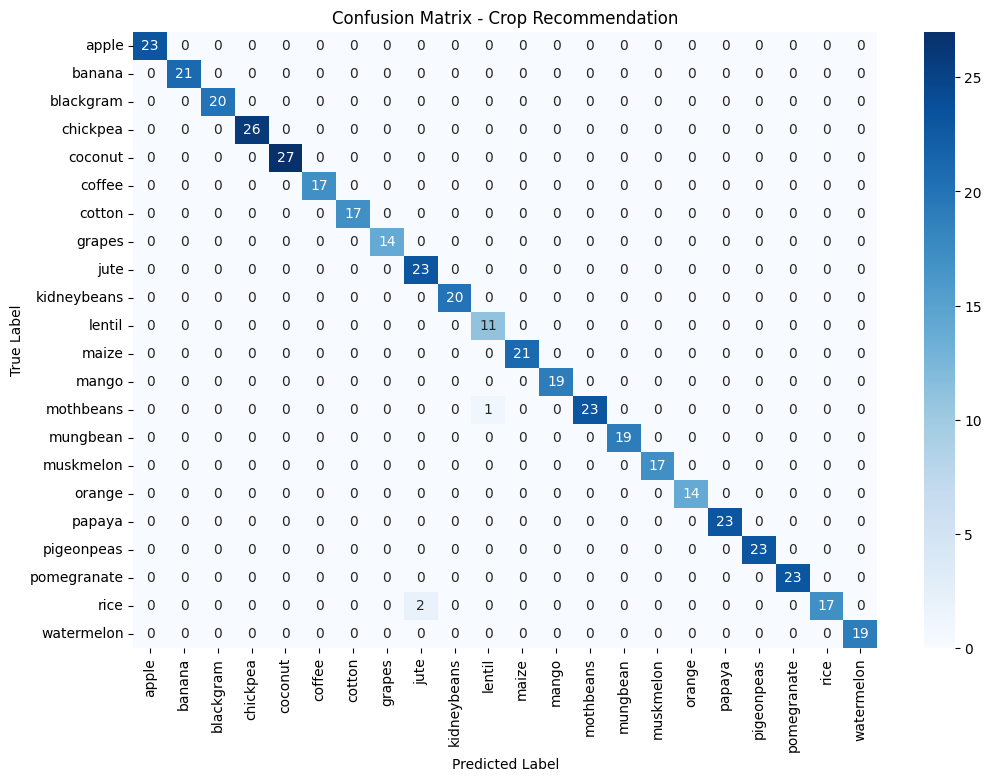

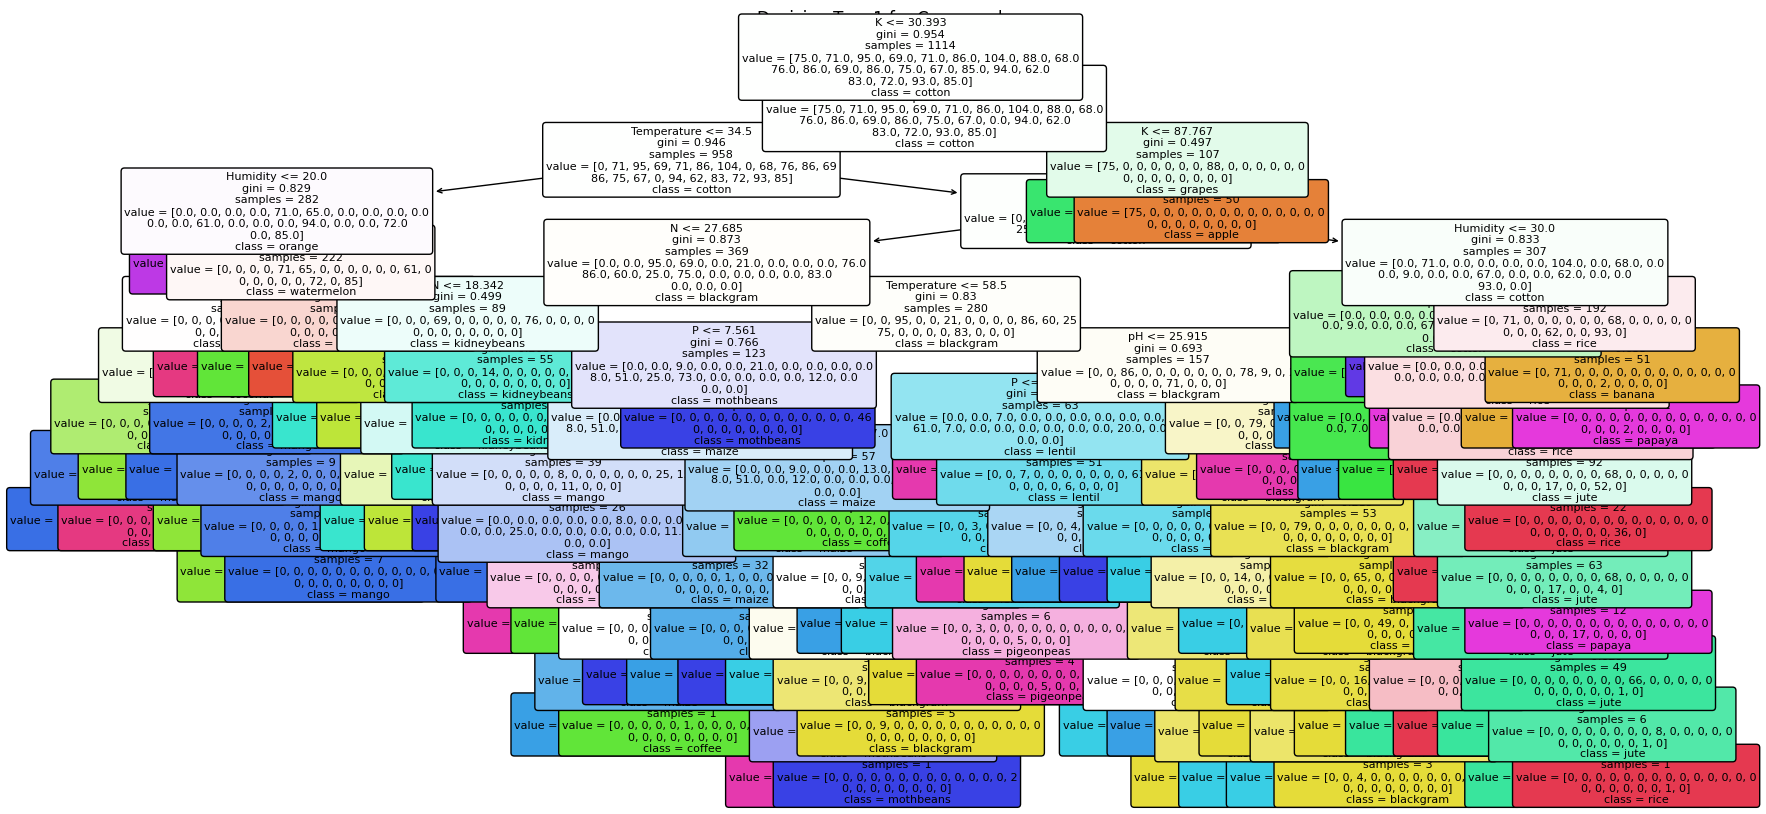

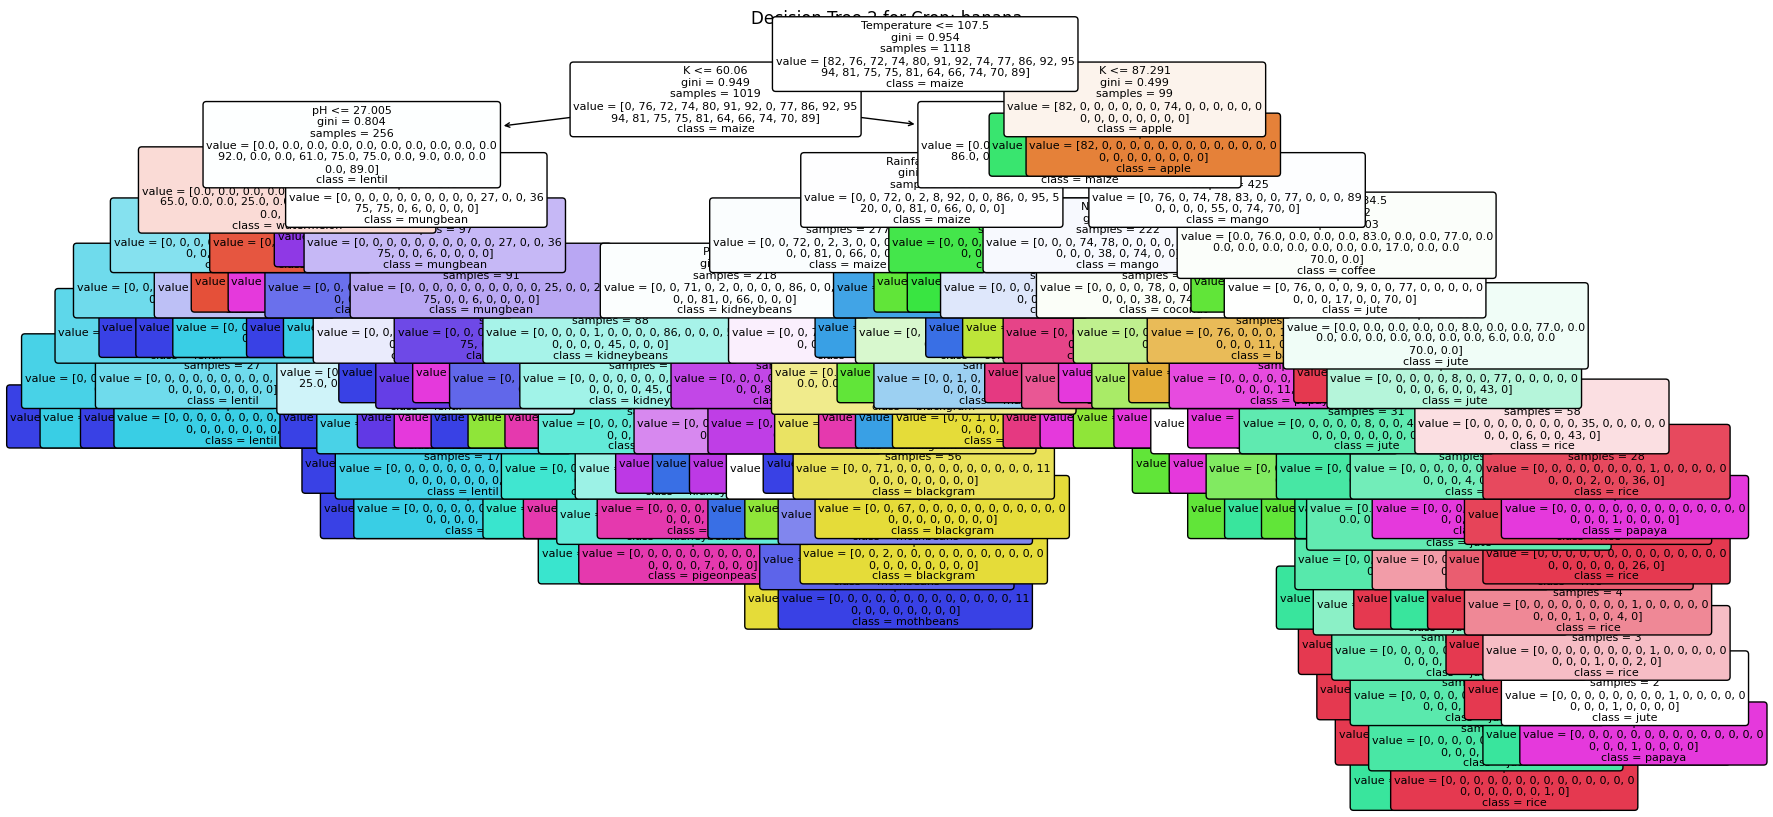

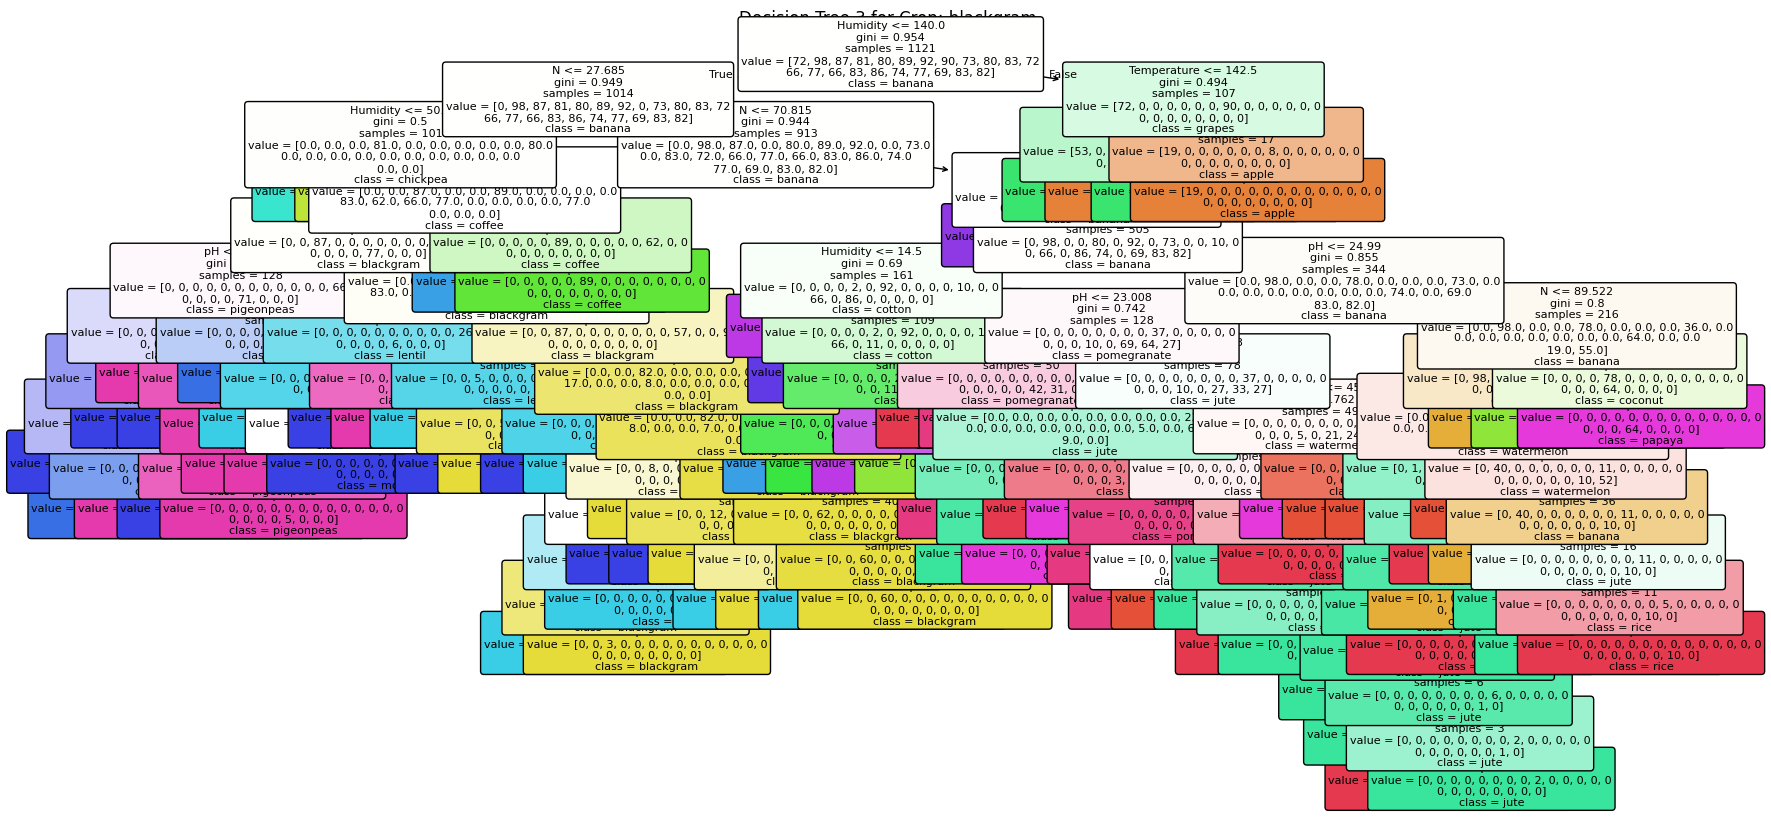

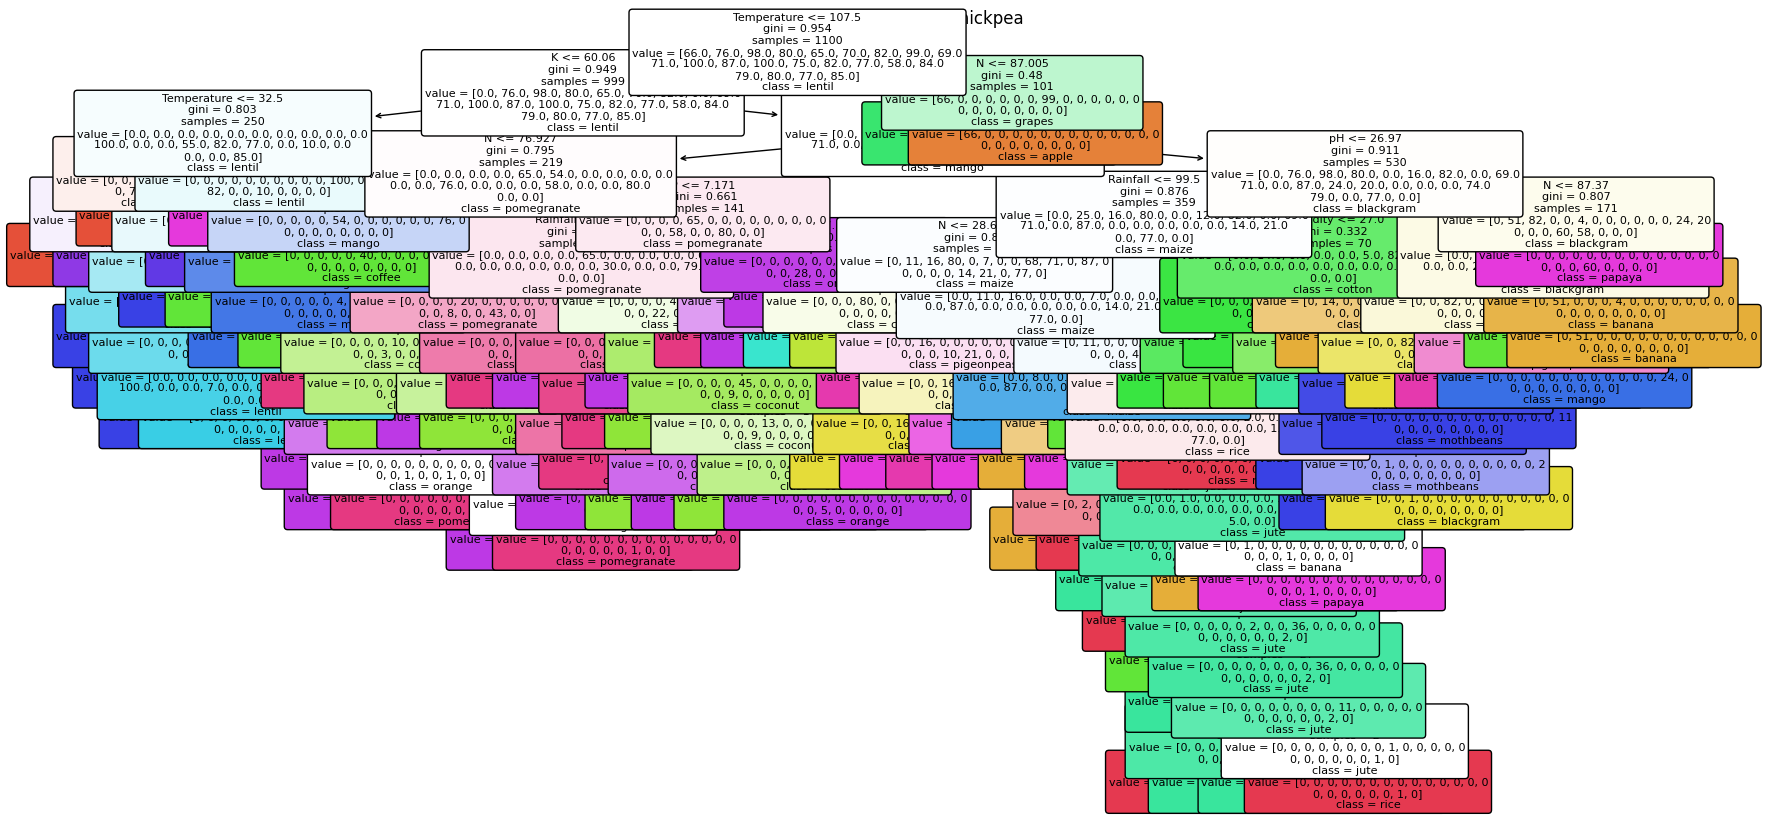

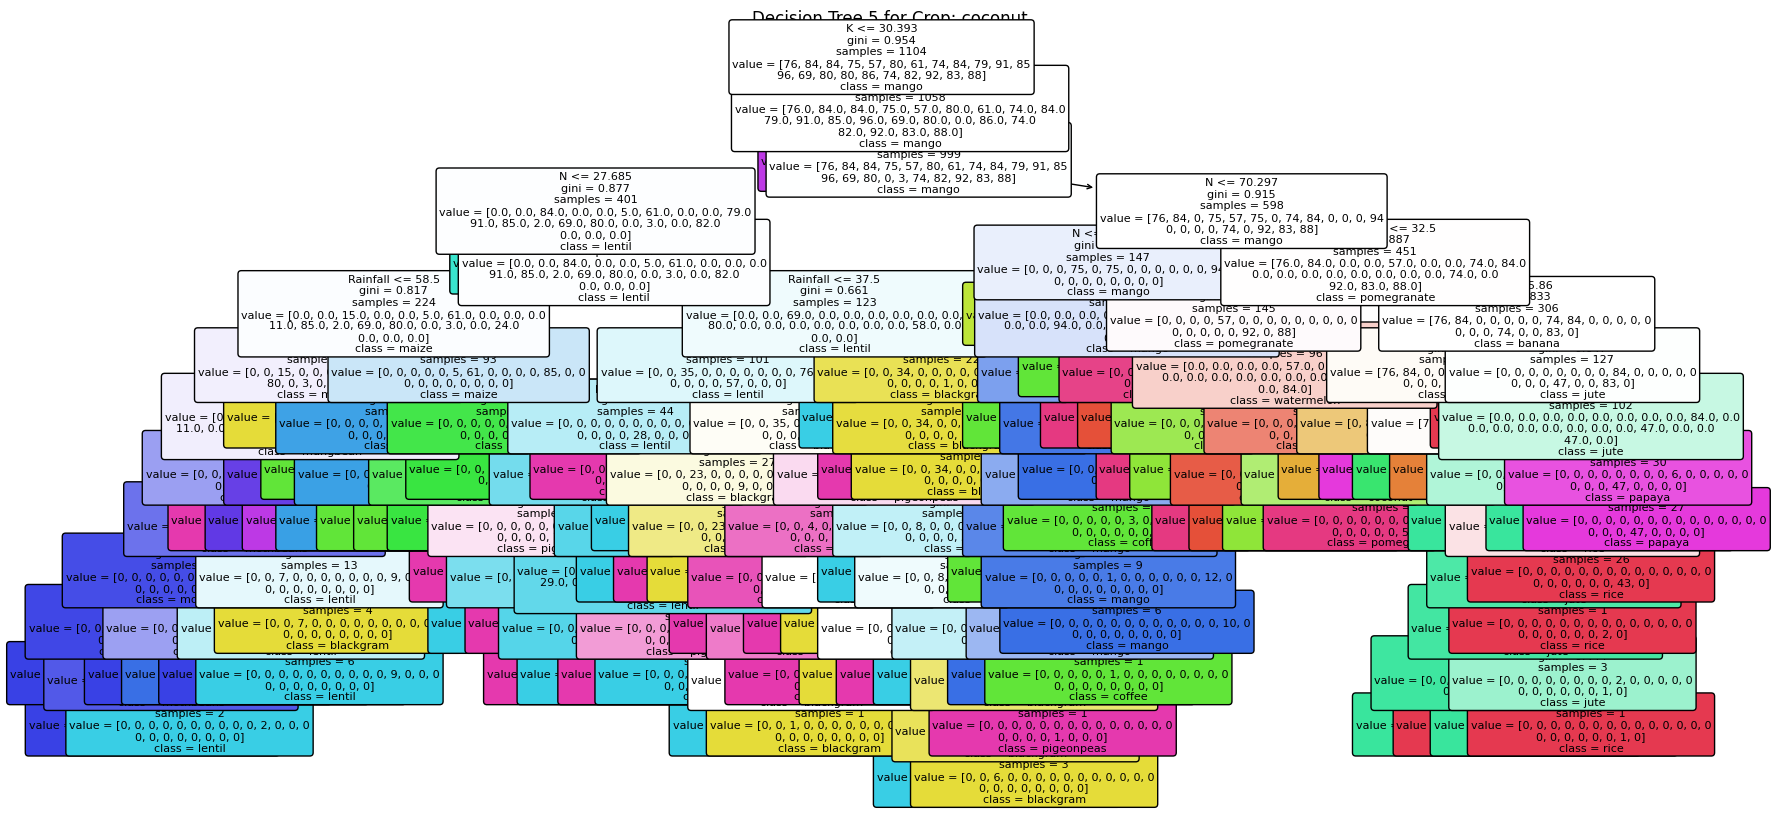

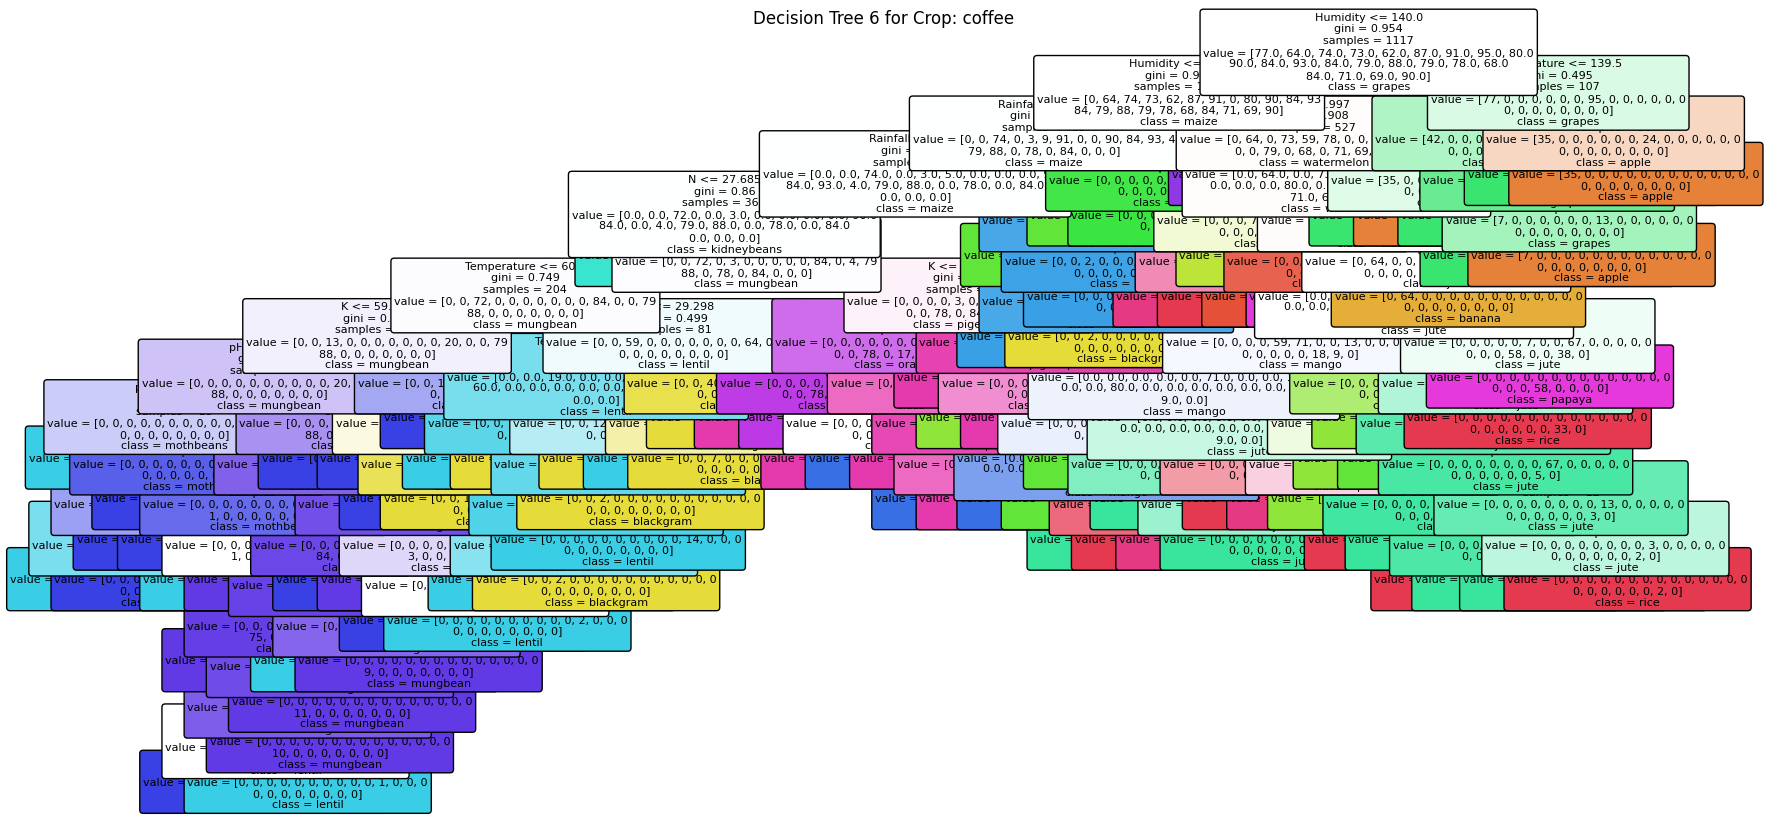

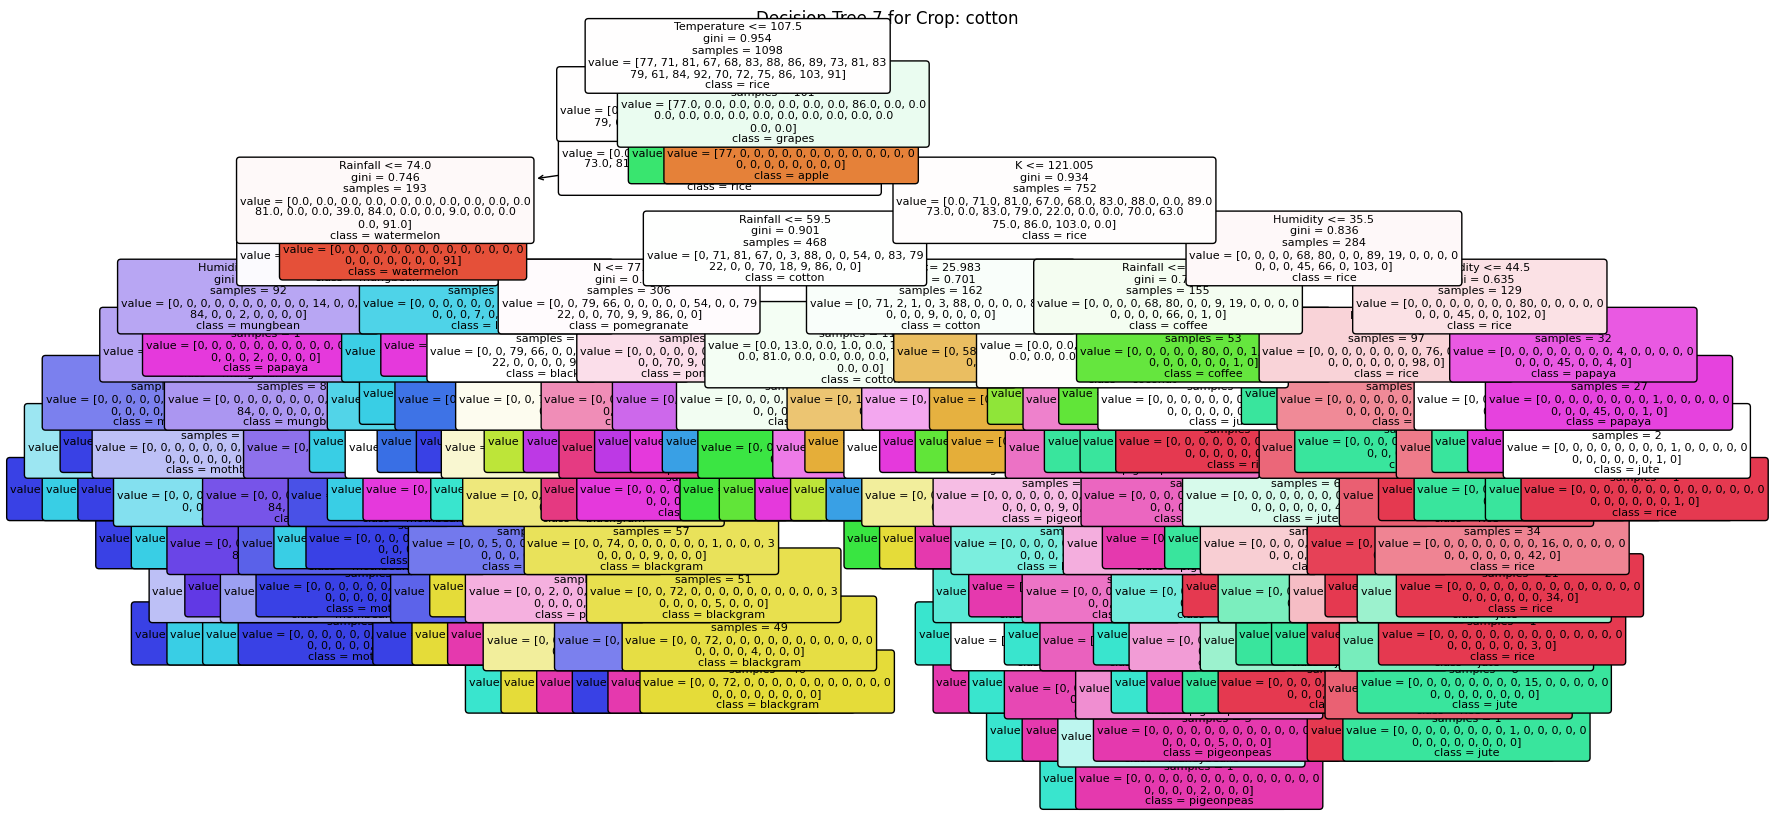

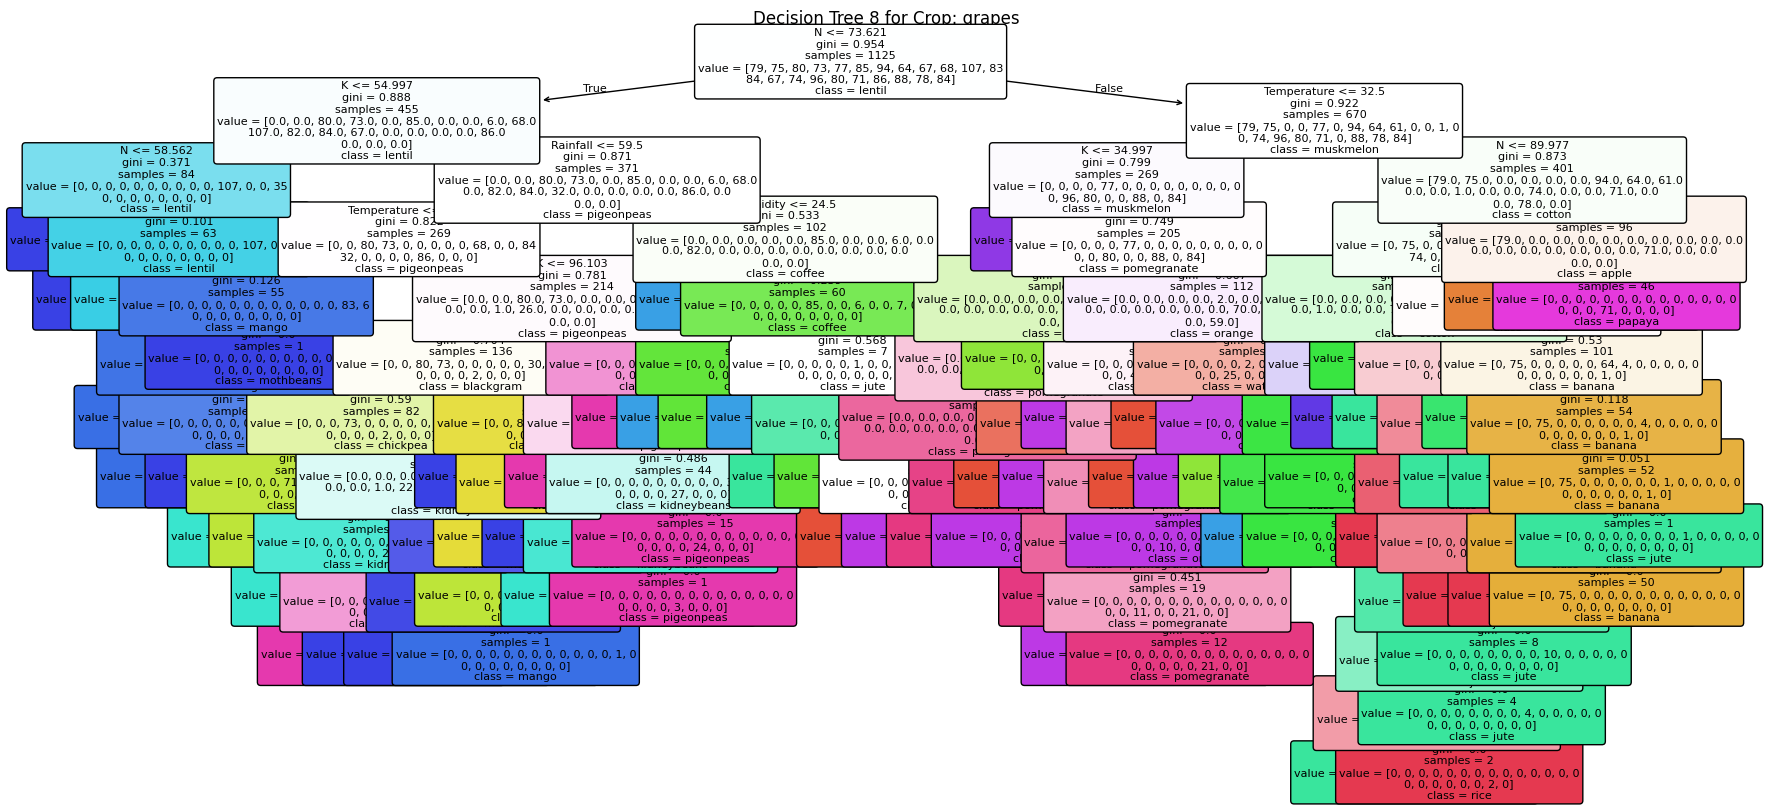

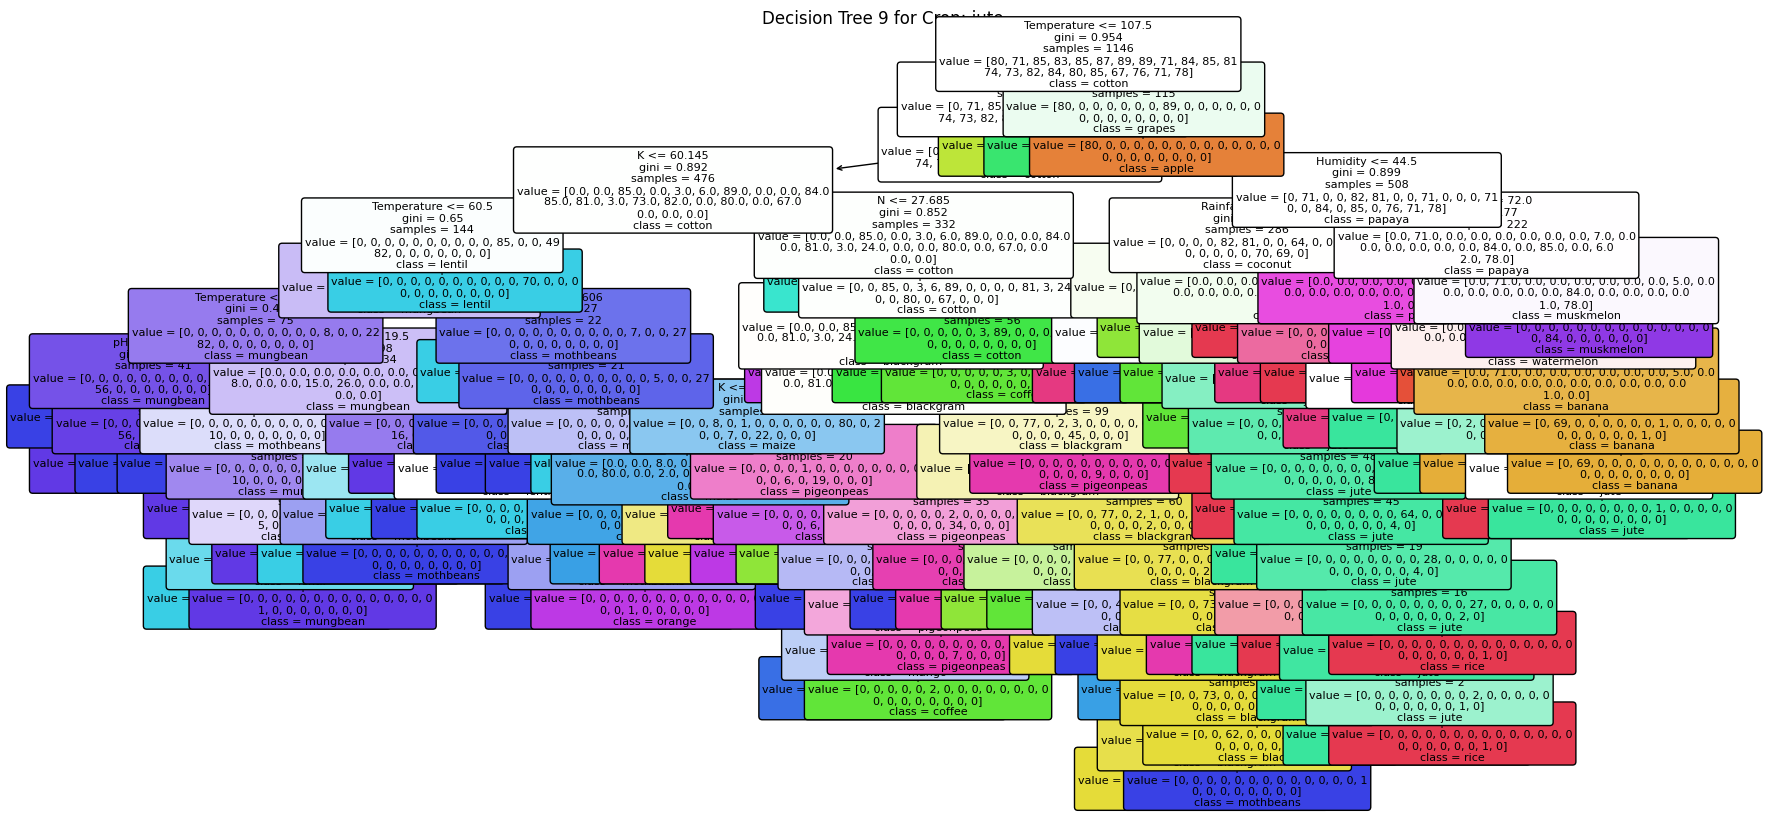

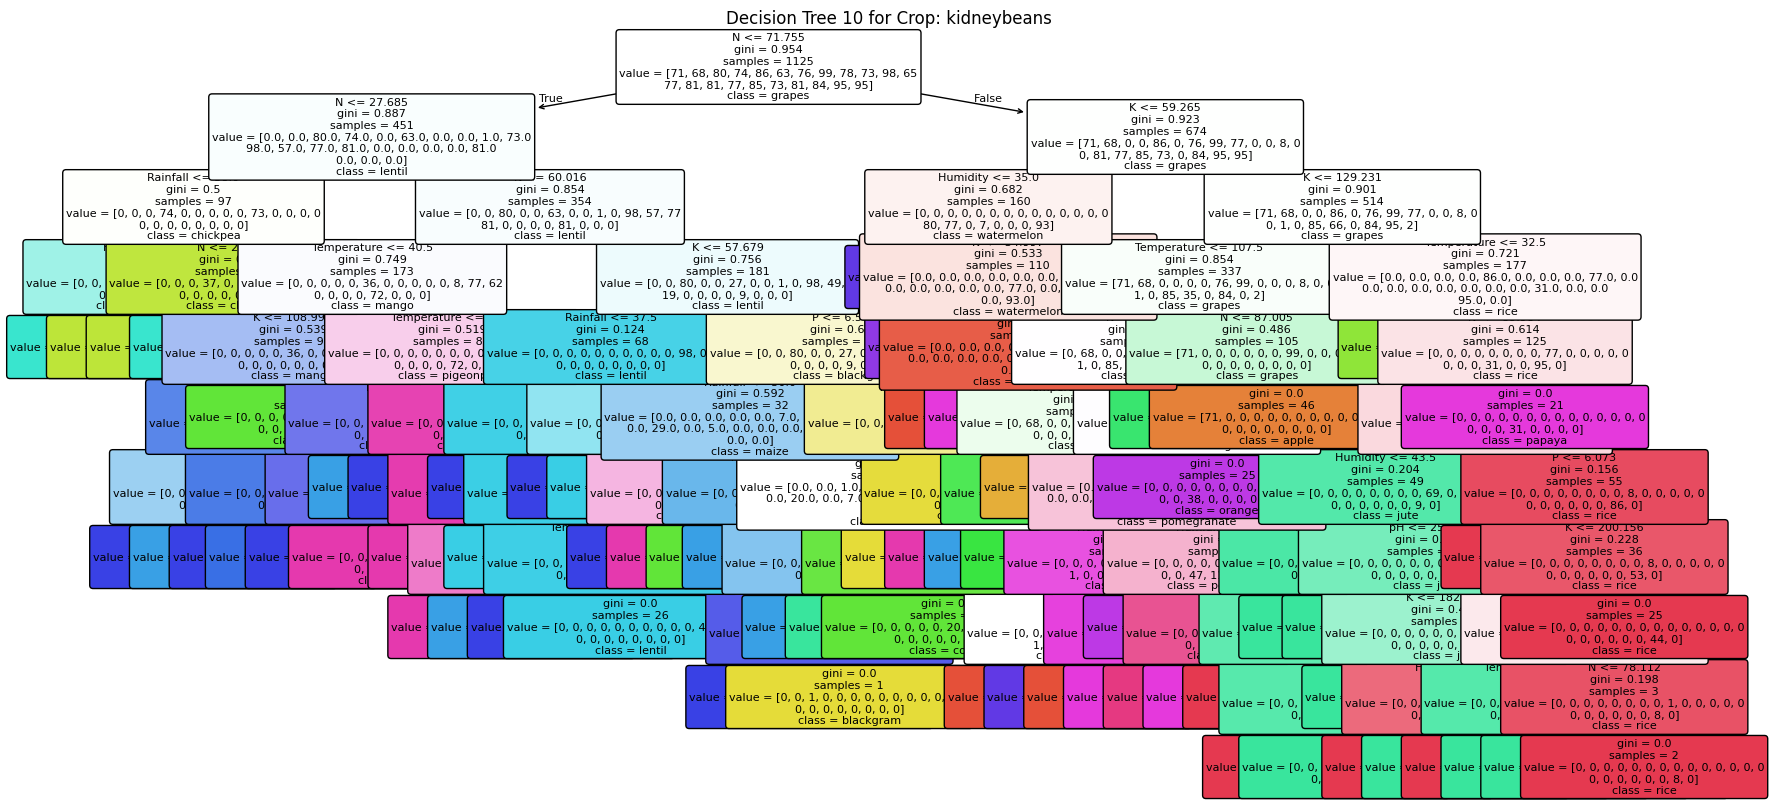

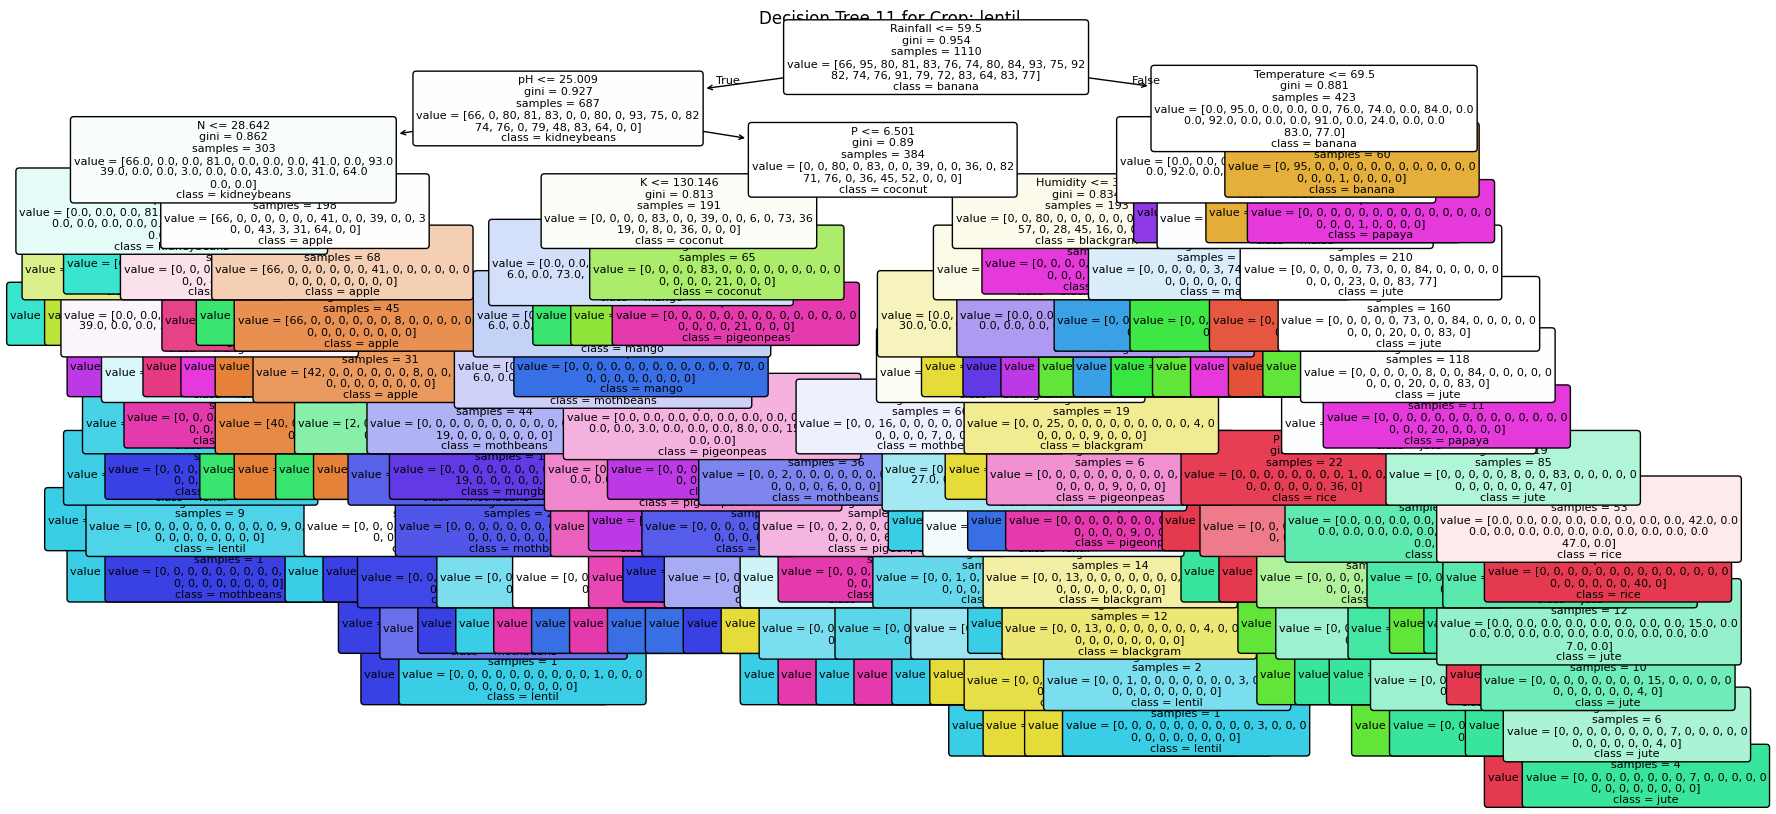

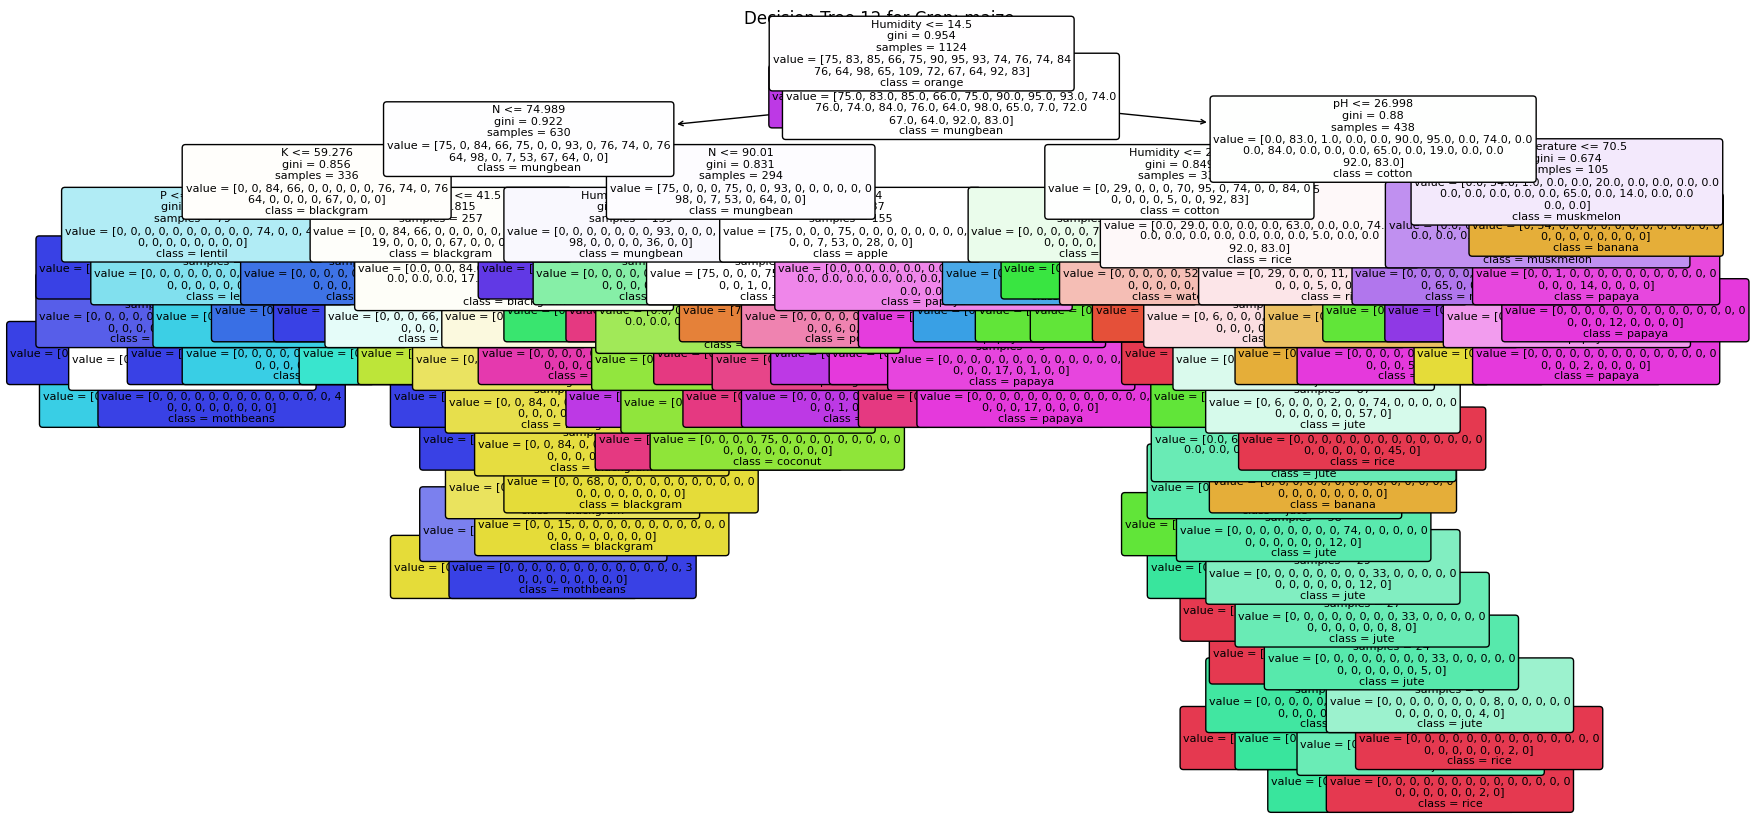

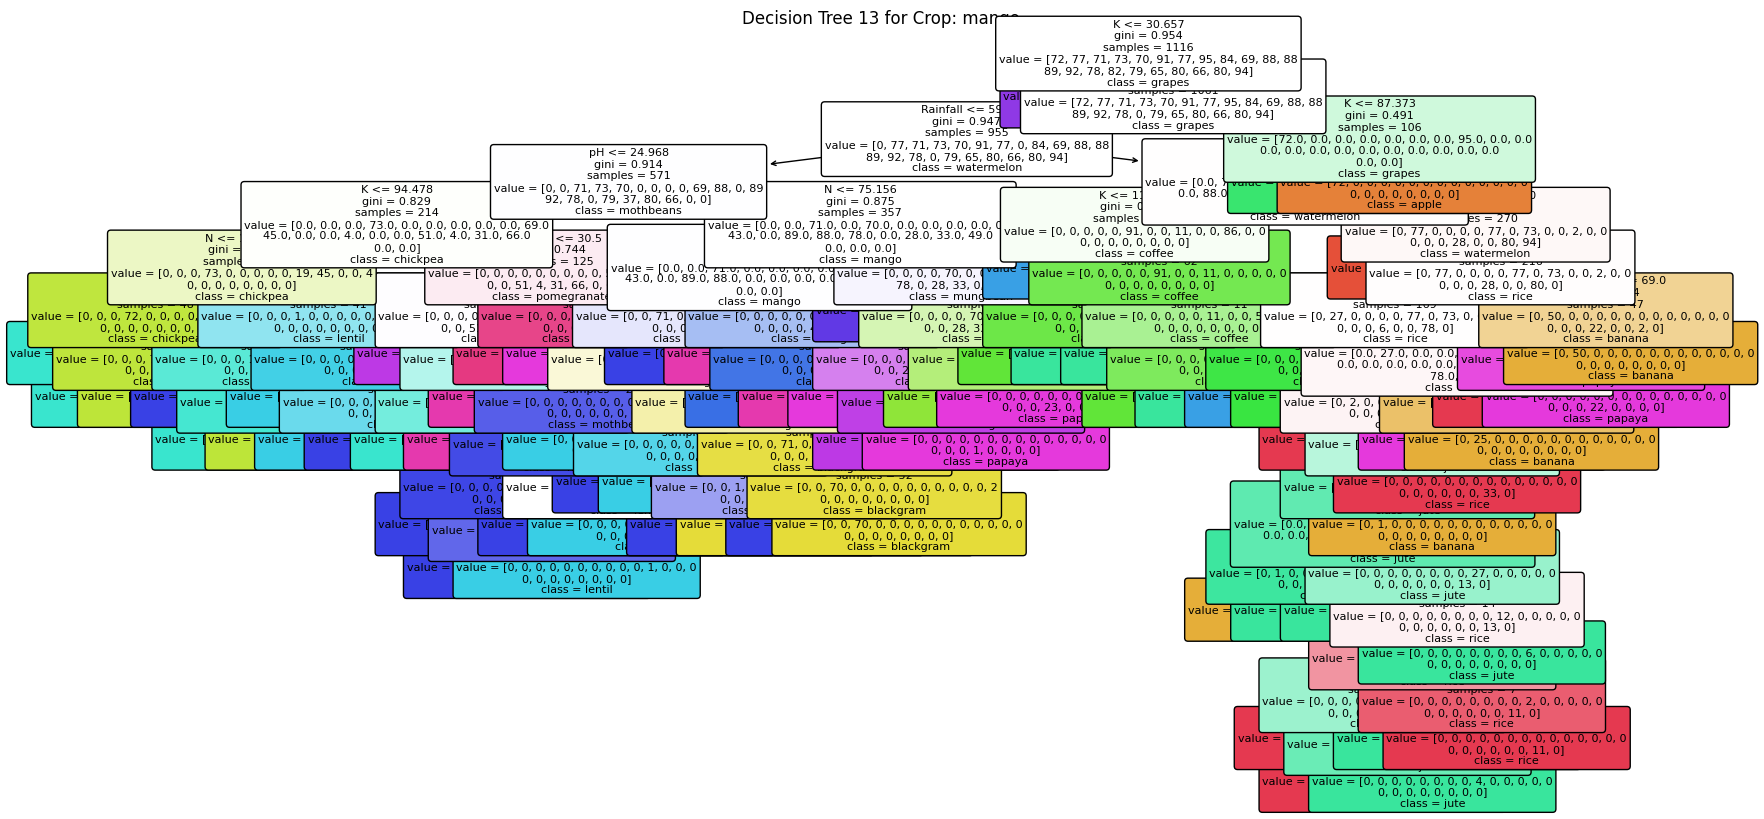

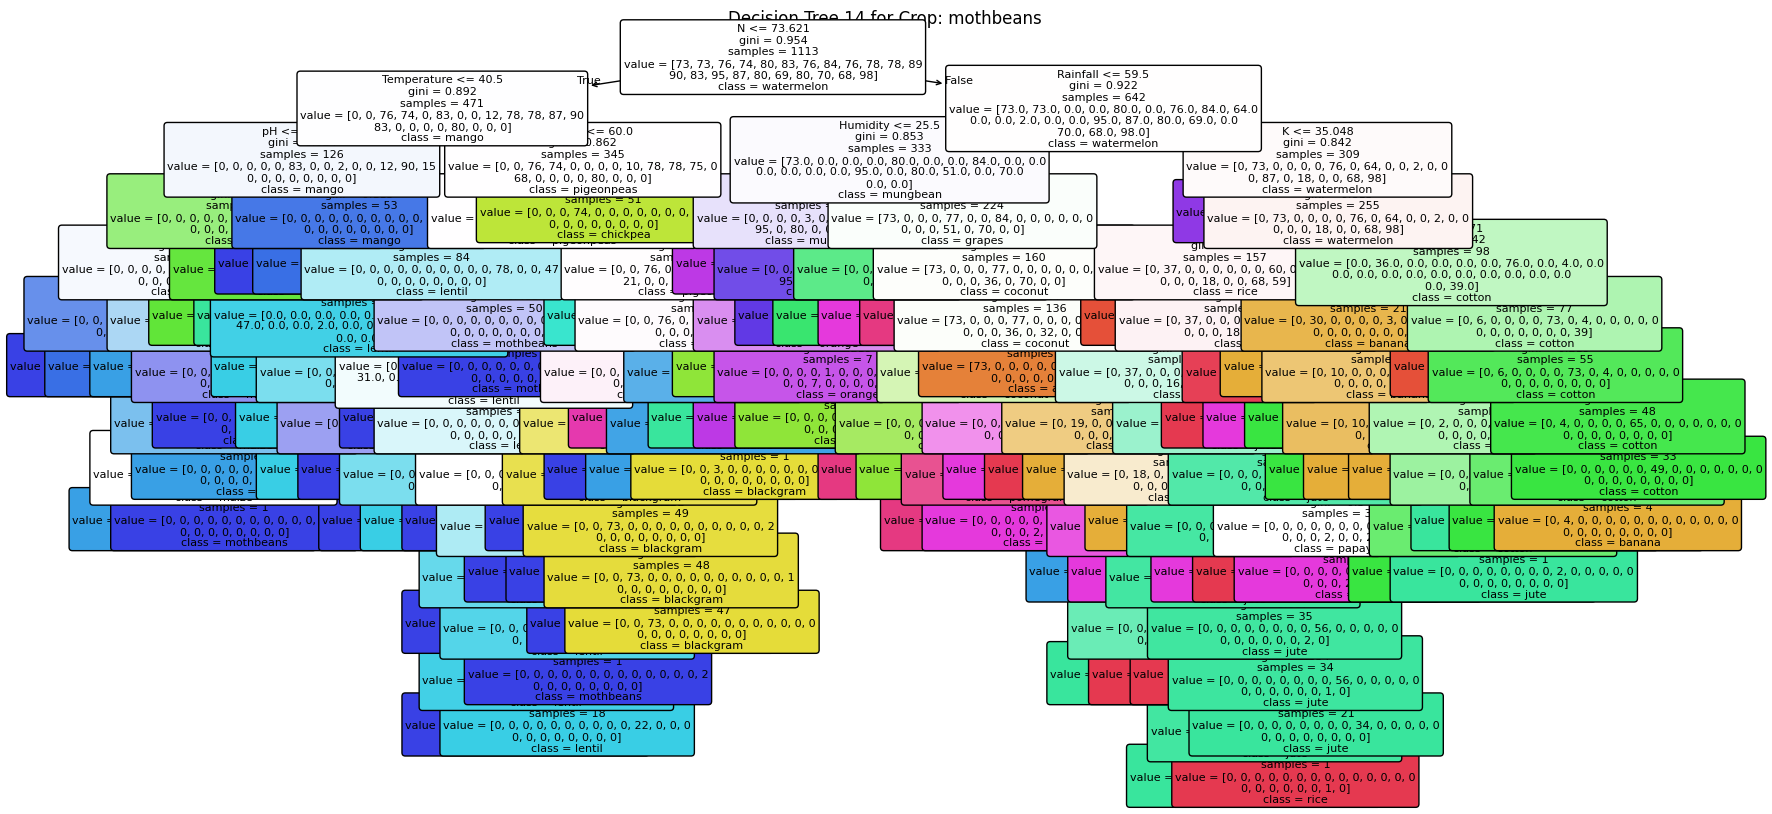

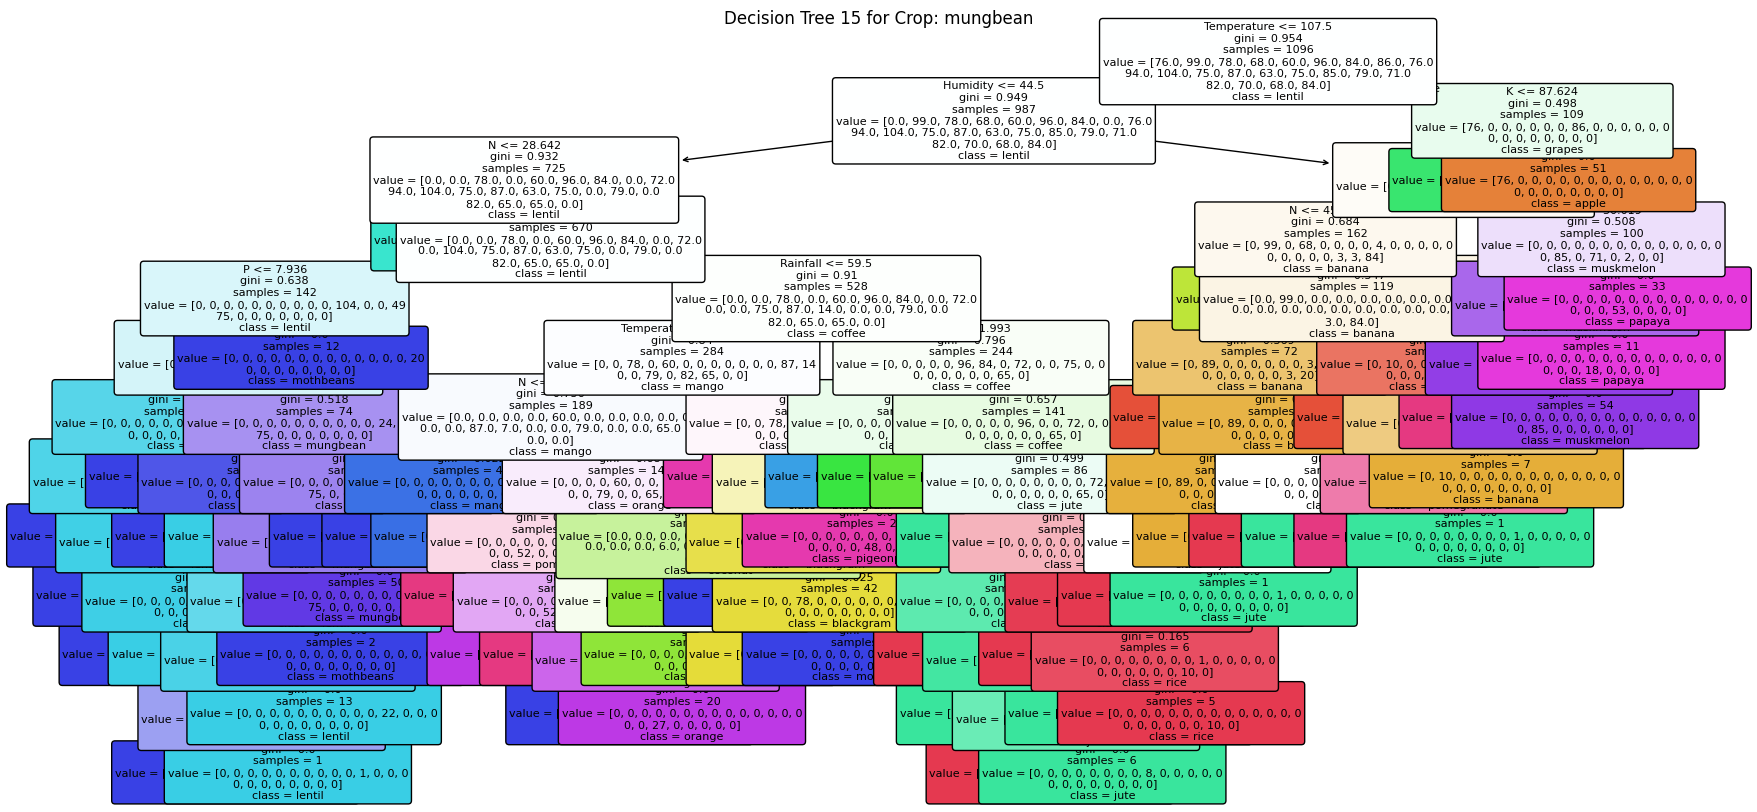

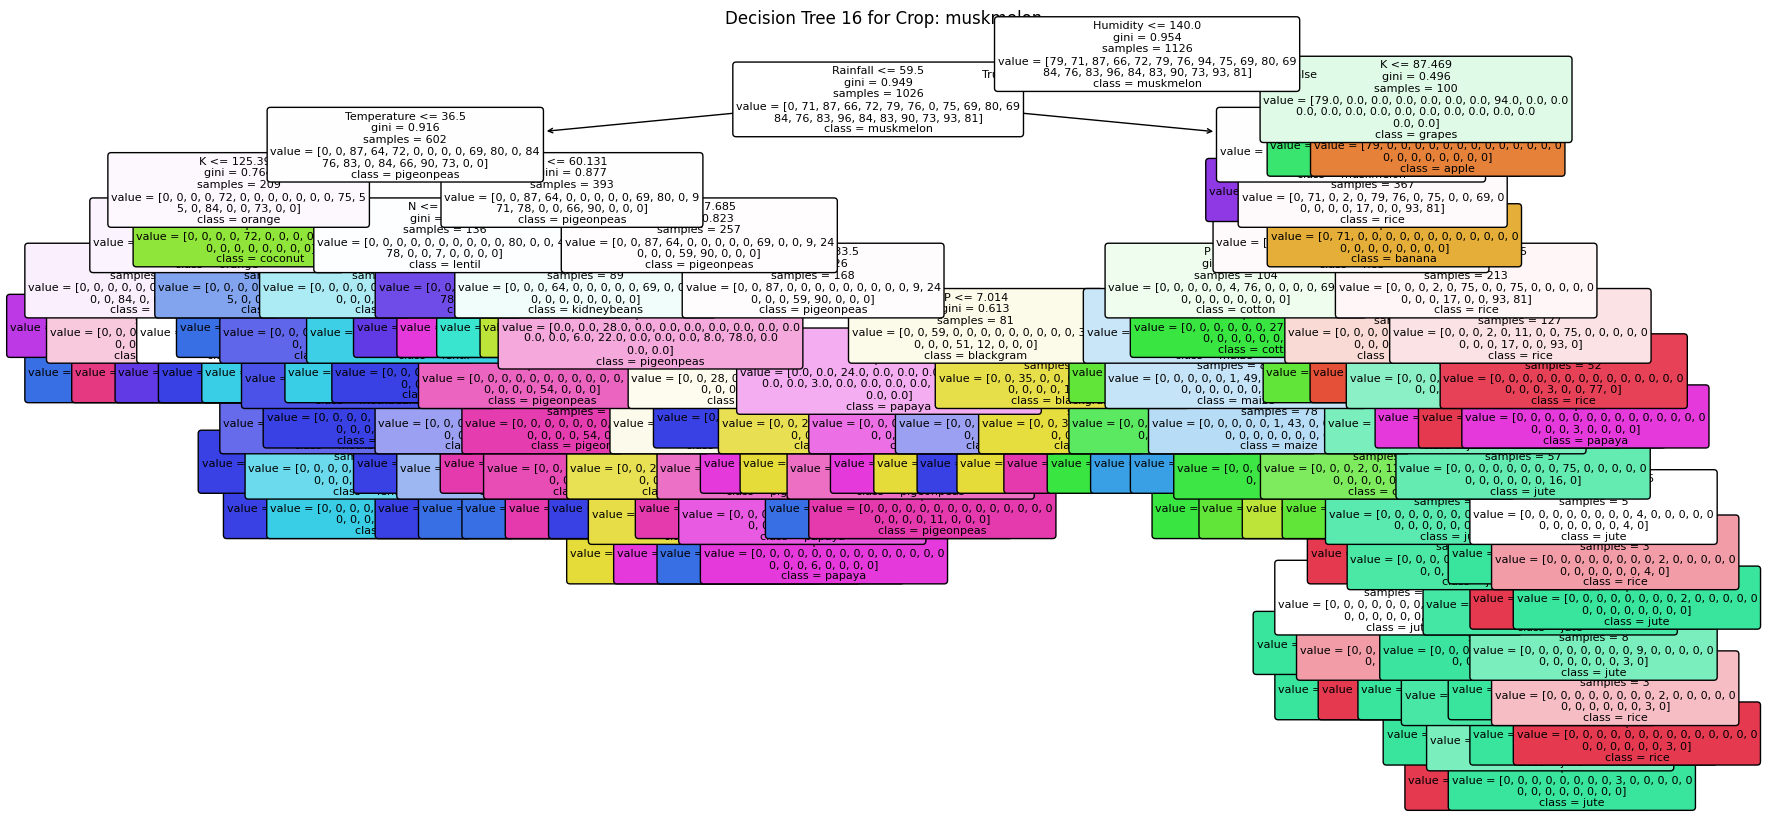

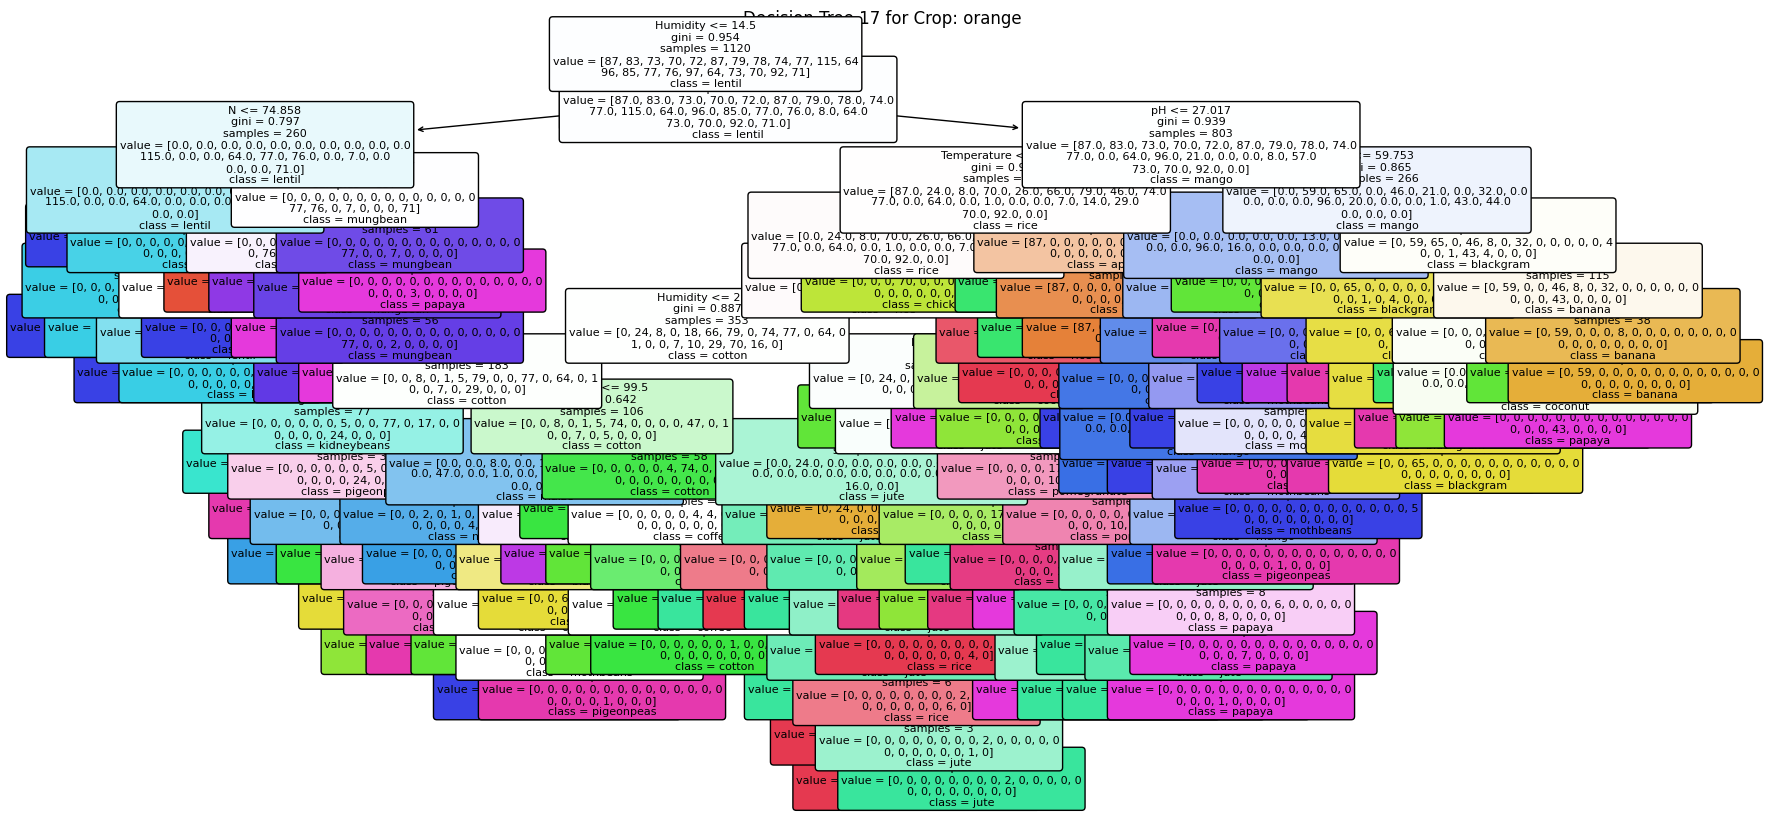

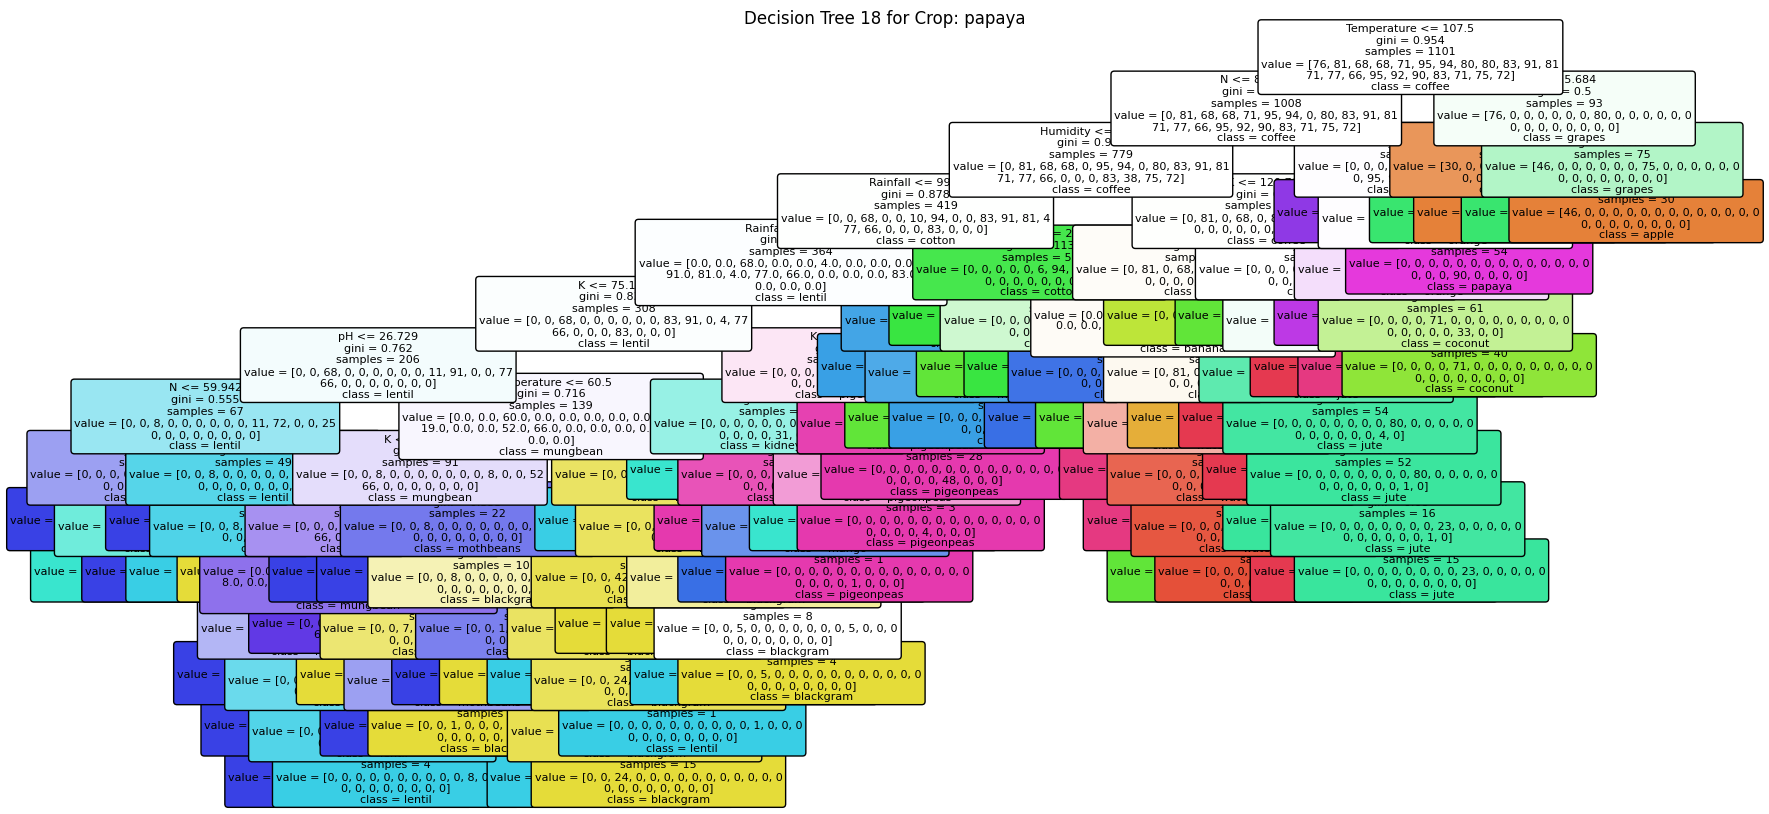

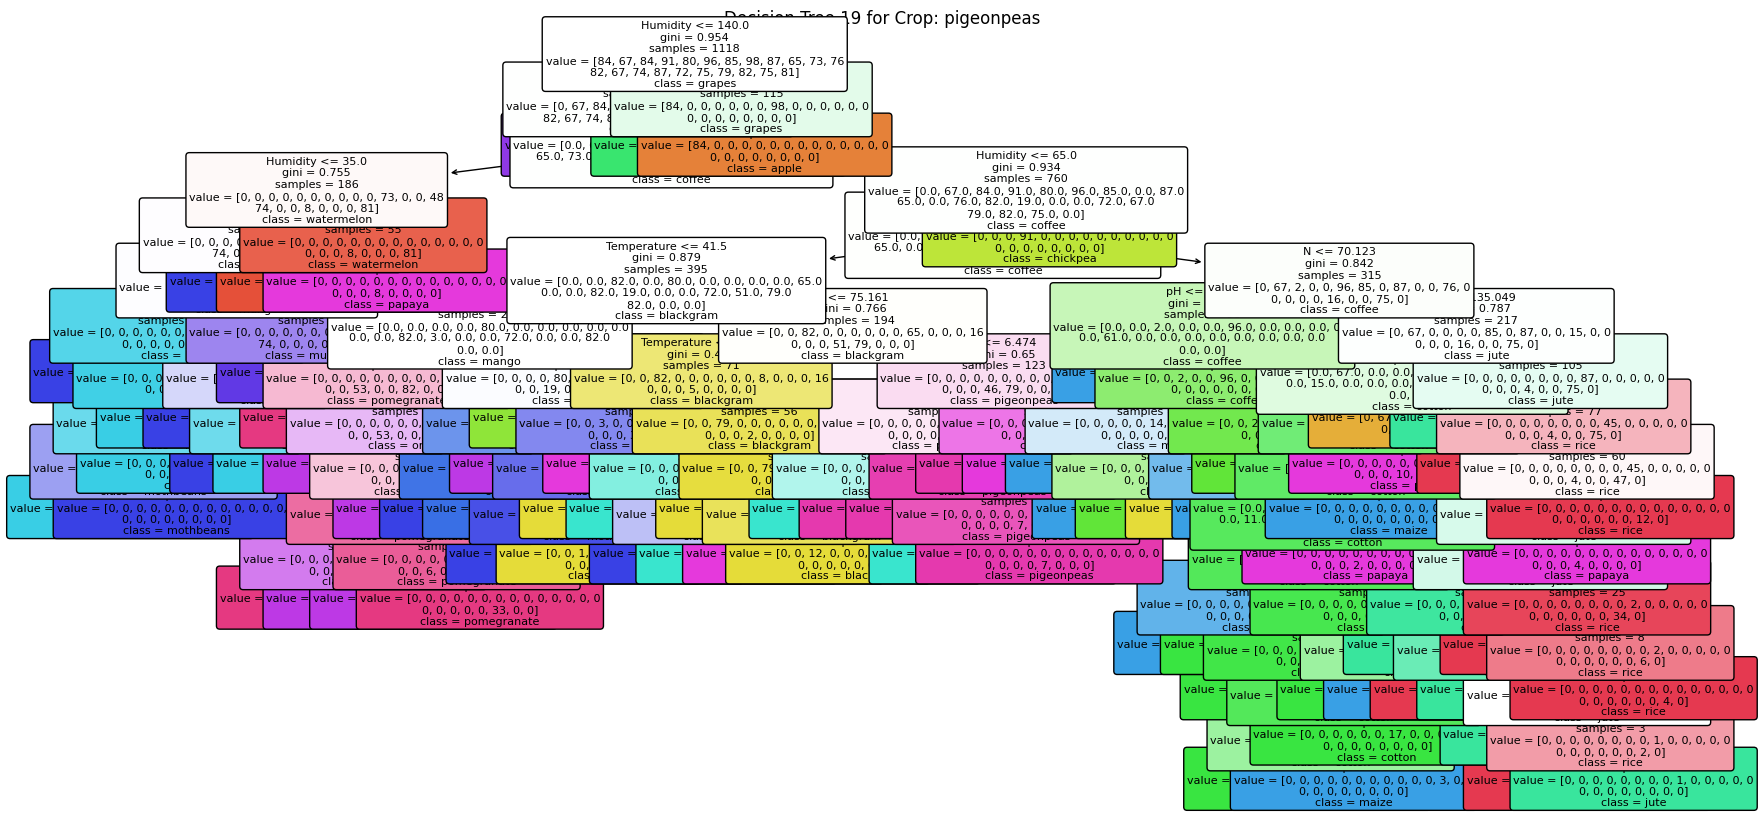

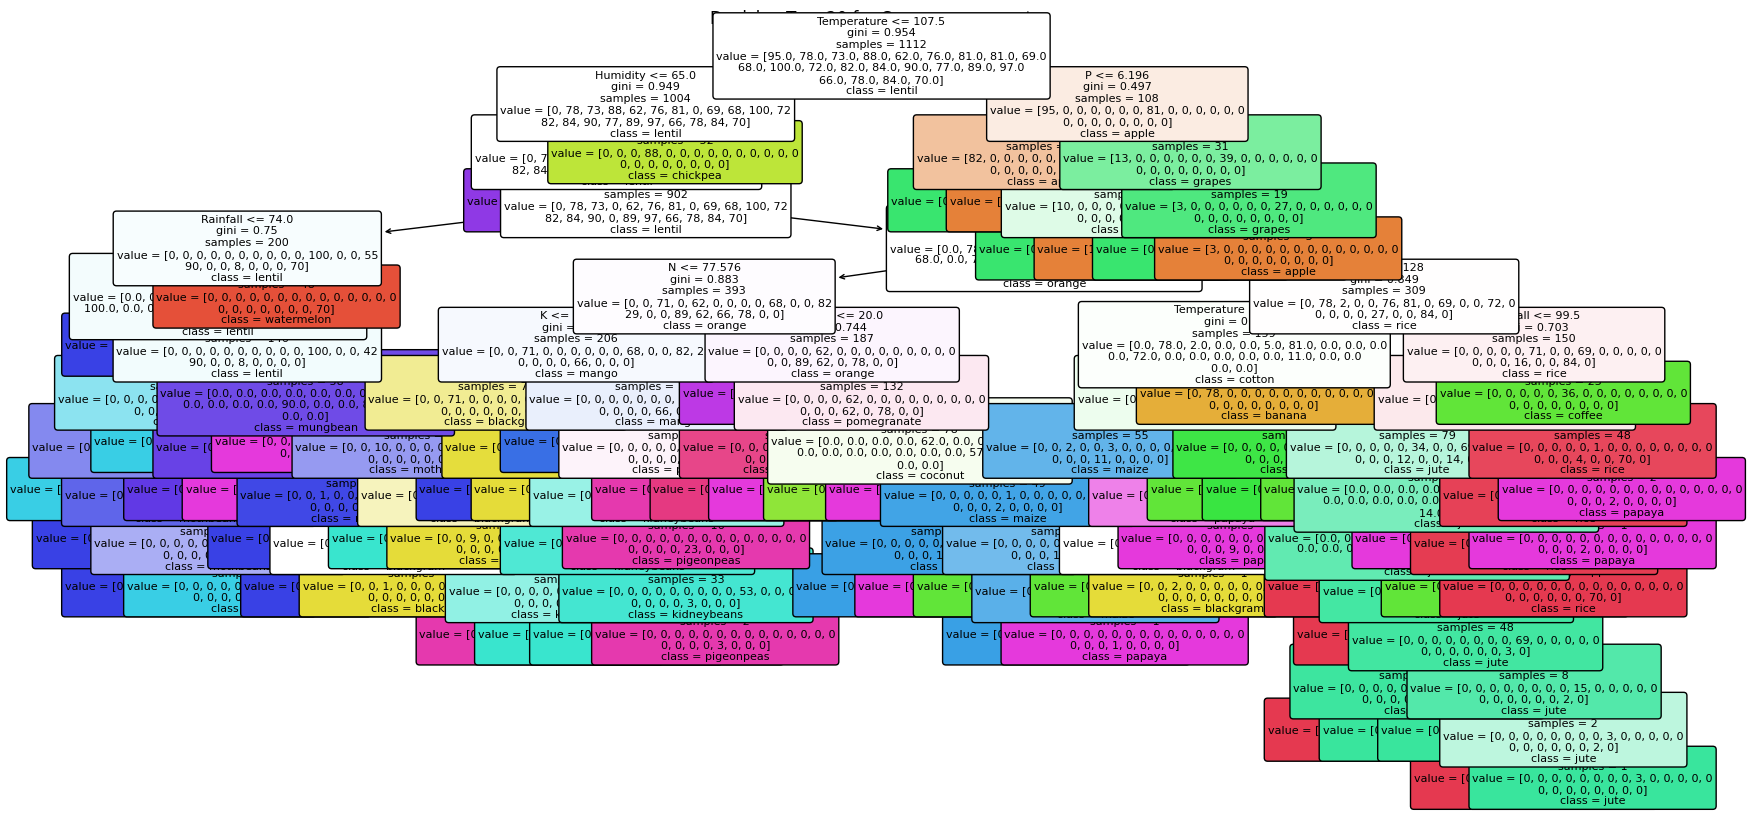

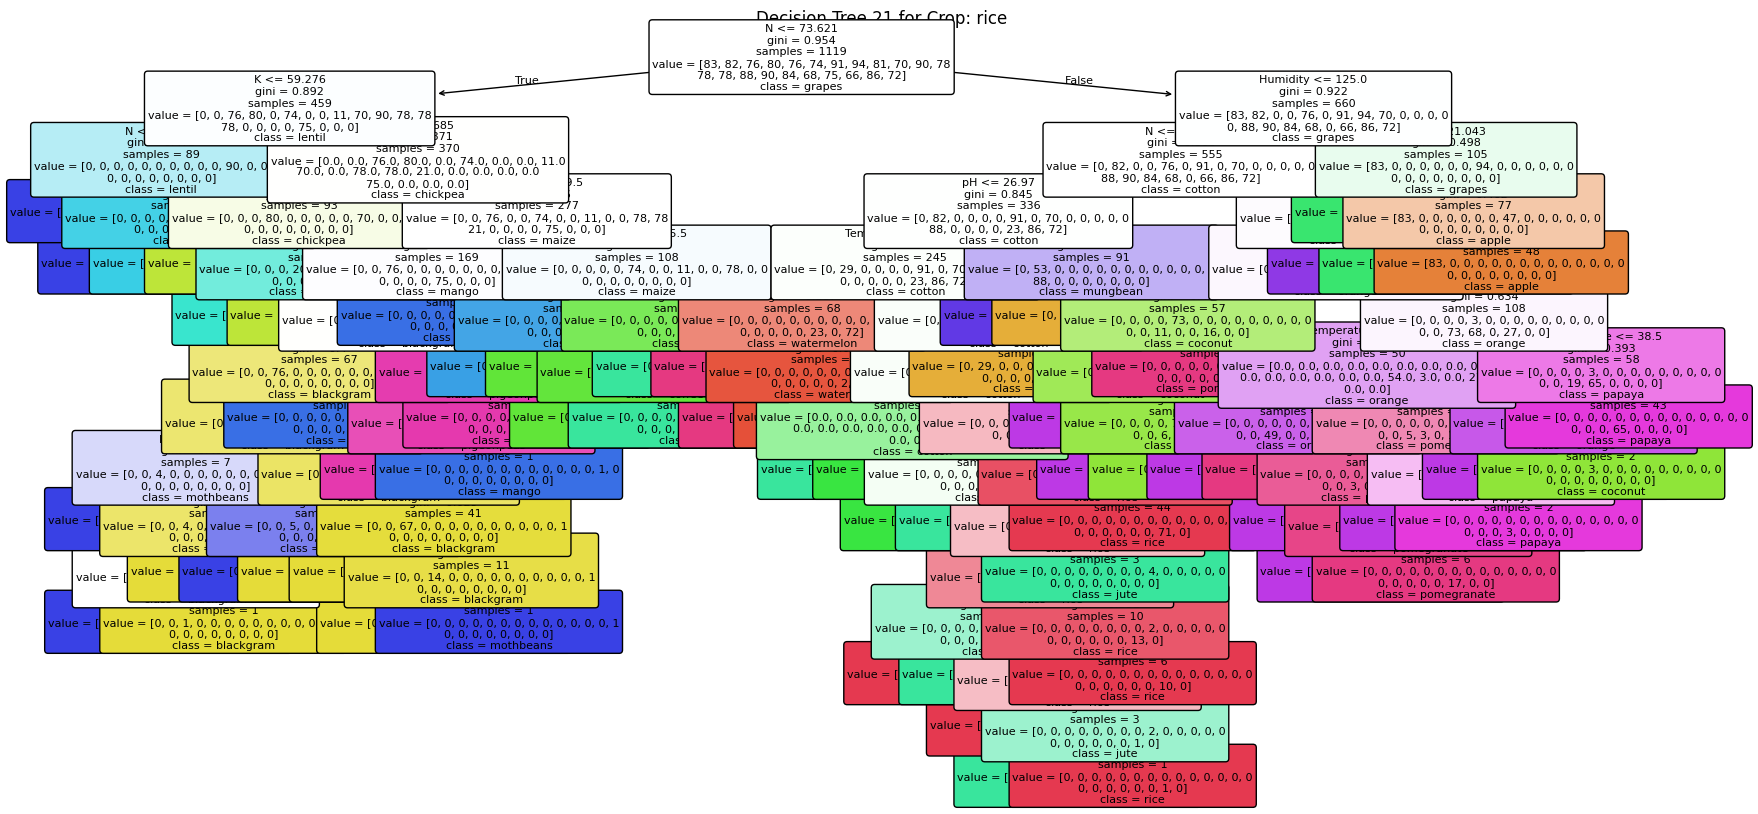

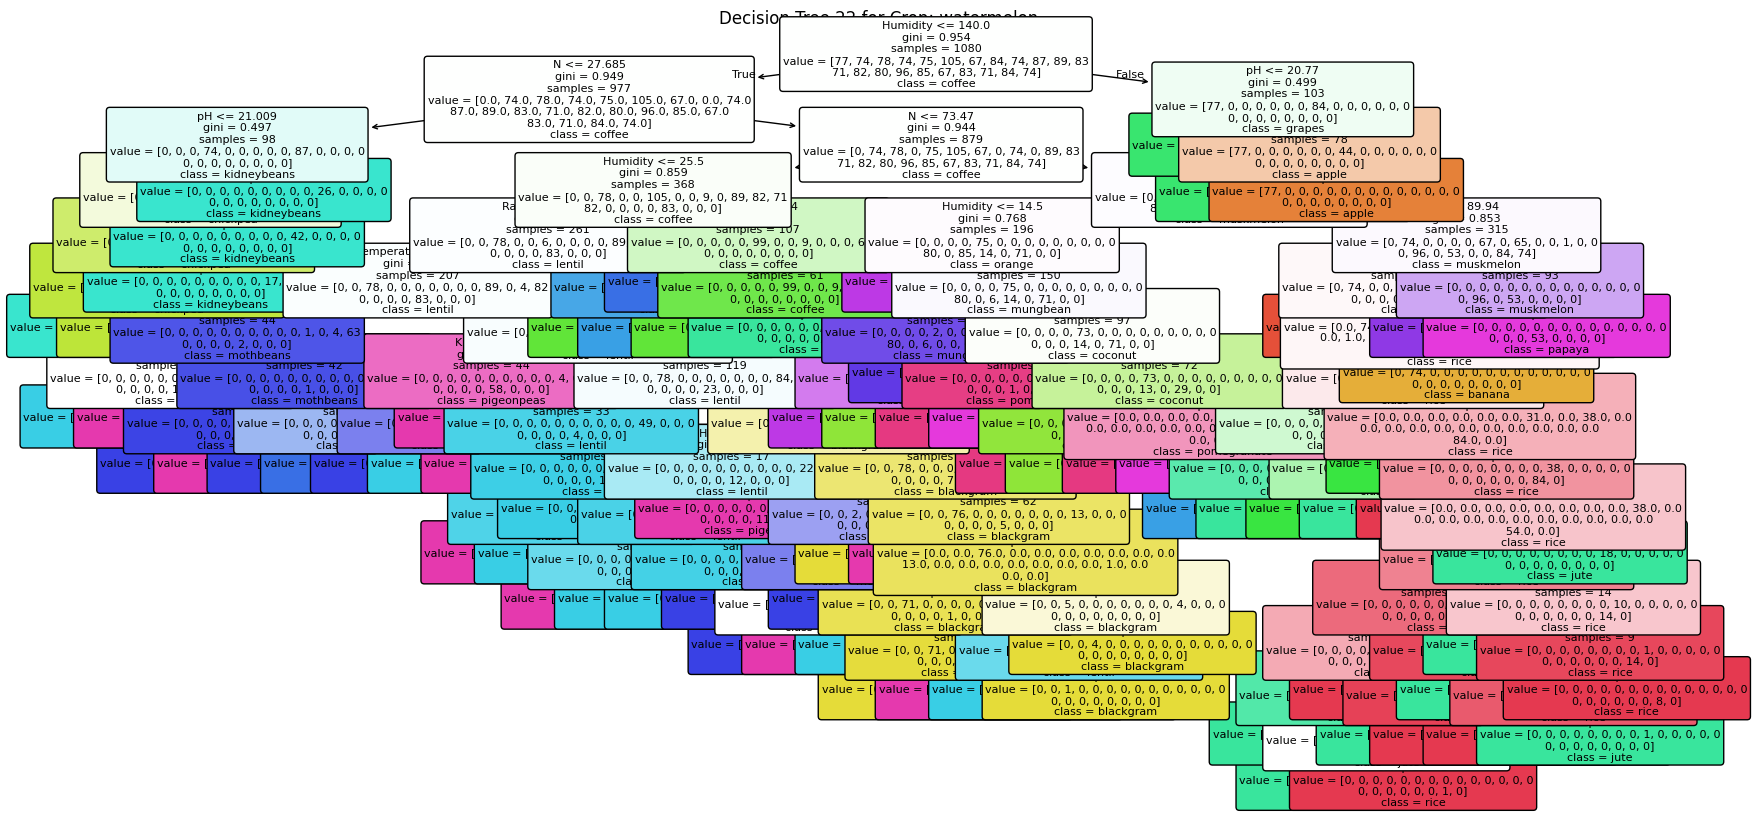

Crop Recommendation Model Saved.


In [2]:
# Install necessary libraries
!pip install pandas scikit-learn joblib matplotlib seaborn

# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import joblib
from sklearn.tree import plot_tree  # Import for decision tree visualization

# Load Dataset
crop_data = pd.read_csv("Crop_recommendation.csv")

# Prepare dataset
X = crop_data.drop(columns=['label'])
y = crop_data['label']

# Split Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Random Forest Classifier
crop_model = RandomForestClassifier(n_estimators=200, random_state=42)
crop_model.fit(X_train, y_train)

# Make Predictions
y_pred = crop_model.predict(X_test)

# **Evaluation Metrics**
accuracy = accuracy_score(y_test, y_pred)
print(f"Crop Recommendation Model Accuracy: {accuracy * 100:.2f}%")

# **Classification Report**
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# **Confusion Matrix**
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(12, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix - Crop Recommendation')
plt.show()

# **Visualizing Multiple Decision Trees for Different Crops**
unique_crops = np.unique(y)
num_trees_to_display = min(len(unique_crops), len(crop_model.estimators_))  # Display up to the number of crops or trees

for i in range(num_trees_to_display):
    plt.figure(figsize=(20, 10))
    single_tree = crop_model.estimators_[i]  # Get one tree from the Random Forest
    dominant_class = unique_crops[i]  # Assign each tree to a unique crop class
    
    plot_tree(single_tree, 
              feature_names=['Rainfall', 'Temperature', 'Humidity', 'pH', 'N', 'P', 'K'], 
              class_names=np.unique(y), 
              filled=True, 
              rounded=True, 
              fontsize=8)
    plt.title(f"Decision Tree {i+1} for Crop: {dominant_class}")
    plt.show()

# Save Model
joblib.dump(crop_model, "crop_recommendation_model.pkl")
print("Crop Recommendation Model Saved.")
